In [0]:
from keras.layers import SimpleRNN


from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print('Loading data...')

Using TensorFlow backend.


Loading data...


In [0]:
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

17465344/17464789 [==============================] - 0s 0us/step


In [0]:
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')

25000 train sequences
25000 test sequences
Pad sequences (samples x time)


In [0]:
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)

input_train shape: (25000, 500)


In [0]:
from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 20000 samples, validate on 5000 samples
Epoch 1/10





20000/20000 [==============================] - 18s 907us/step - loss: 0.5833 - acc: 0.6905 - val_loss: 0.4128 - val_acc: 0.8384
Epoch 2/10
20000/20000 [==============================] - 18s 879us/step - loss: 0.3730 - acc: 0.8460 - val_loss: 0.3592 - val_acc: 0.8510
Epoch 3/10
20000/20000 [==============================] - 17s 872us/step - loss: 0.2824 - acc: 0.8875 - val_loss: 0.3673 - val_acc: 0.8548
Epoch 4/10
20000/20000 [==============================] - 17s 866us/step - loss: 0.2138 - acc: 0.9189 - val_loss: 0.4443 - val_acc: 0.7810
Epoch 5/10
20000/20000 [==============================] - 17s 868us/step - loss: 0.1567 - acc: 0.9439 - val_loss: 0.4498 - val_acc: 0.8330
Epoch 6/10
20000/20000 [==============================] - 17s 862us/step - loss: 0.1099 - acc: 0.9611 - val_loss: 0.4832 - val_acc: 0.8196
Epoch 7/10

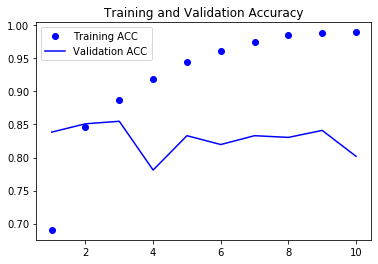

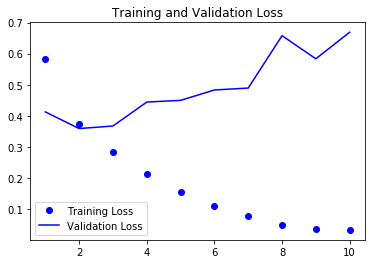

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training ACC')
plt.plot(epochs, val_acc, 'b', label='Validation ACC')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()